In [26]:
__file__ = 'rad_zu_ord_fit.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP2_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up

In [27]:
data = []
for file in sorted(os.listdir('Data')):
        with open('Data/'+file, mode='r') as tf:
            data = np.genfromtxt(tf,delimiter="\t").T

In [28]:
ord = data[0]
m1 = up.uarray(data[1],np.full(len(data[1]),0.05))

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 19
    # variables        = 2
    chi-square         = 28851.6066
    reduced chi-square = 1697.15333
    Akaike info crit   = 143.184158
    Bayesian info crit = 145.073036
    R-squared          = 0.67492227
[[Variables]]
    slope:      41.4776440 +/- 0.28689915 (0.69%) (init = 41.47764)
    intercept: -0.44190295 +/- 0.98162715 (222.14%) (init = -0.441903)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.877


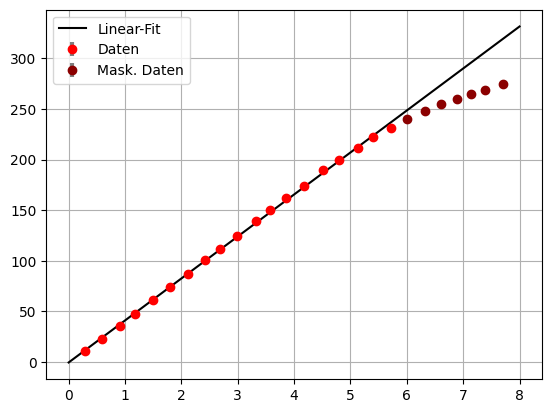

In [29]:
mask = 19

res1 = f.linear_fit(up.nominal_values(m1)[0:mask],ord[0:mask],up.std_devs(m1)[0:mask])
plt.show()
print(res1.fit_report())
plt.errorbar(ord[0:mask],up.nominal_values(m1)[0:mask],yerr = up.std_devs(m1)[0:mask],fmt='ro',ecolor='gray', elinewidth=3, capsize=0,label = 'Daten')
plt.errorbar(ord[mask:-1],up.nominal_values(m1)[mask:-1],yerr = up.std_devs(m1)[mask:-1],fmt='o',color='darkred',ecolor='gray', elinewidth=3, capsize=0,label = 'Mask. Daten')
plt.plot(np.arange(0,9),res1.eval(x=np.arange(0,9)),color='k',linestyle='-',alpha=1,label="Linear-Fit")




plt.grid()
plt.legend()